2 - To identify countries with the highest and lowest rates of terrorism and elucidate factors contributing to these variations

In [83]:
# Declaring Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Load the dataset
terror = pd.read_csv('Resources/Terrorism_Dataset.csv', encoding= 'ISO-8859-1', low_memory= False)
terror.head()

,iyear,imonth,iday,country,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,gname,motive,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN


In [36]:
# Rename columns for better readability
terror.rename(columns={
    'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country': 'Country', 
    'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 
    'nkill': 'Killed', 'nwound': 'Wounded', 'summary': 'Summary', 'gname': 'Group', 
    'targtype1_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'
}, inplace=True)

In [54]:
# Select relevant columns
terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 
                 'AttackType', 'Killed', 'Wounded', 'Target', 'Group', 'Target_type', 
                 'Weapon_type', 'Motive']]
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


The following breaks down the countries and regions with the highest and lowest terrorim rates

1. Country with Highest Terrorist Attacks
2. Country with Lowest Terrorist Attacks
3. Region(s) with Highest Terrorist Attacks
4. Region(s) with Lowest Terrorist Attacks

In [55]:
# Country with the highest terrorist attacks
country_most_attacks = terror['Country'].value_counts().index[0]
print('Country with Highest Terrorist Attacks:', country_most_attacks)

Country with Highest Terrorist Attacks: Iraq


In [75]:
# Country with the lowest terrorist attacks
country_least_attacks = terror['Country'].value_counts().index[-1]
print('Country with Lowest Terrorist Attacks:', country_least_attacks)

Country with Lowest Terrorist Attacks: Antigua and Barbuda


In [44]:
# Region with the highest terrorist attacks
region_most_attacks = terror['Region'].value_counts().index[0]
print('Regions with Highest Terrorist Attacks:', region_most_attacks)

Regions with Highest Terrorist Attacks: Middle East & North Africa


In [76]:
# Region with the lowest terrorist attacks
region_least_attacks = terror['Region'].value_counts().index[-1]
print('Region with Lowest Terrorist Attacks:', region_least_attacks)

Region with Lowest Terrorist Attacks: Australasia & Oceania


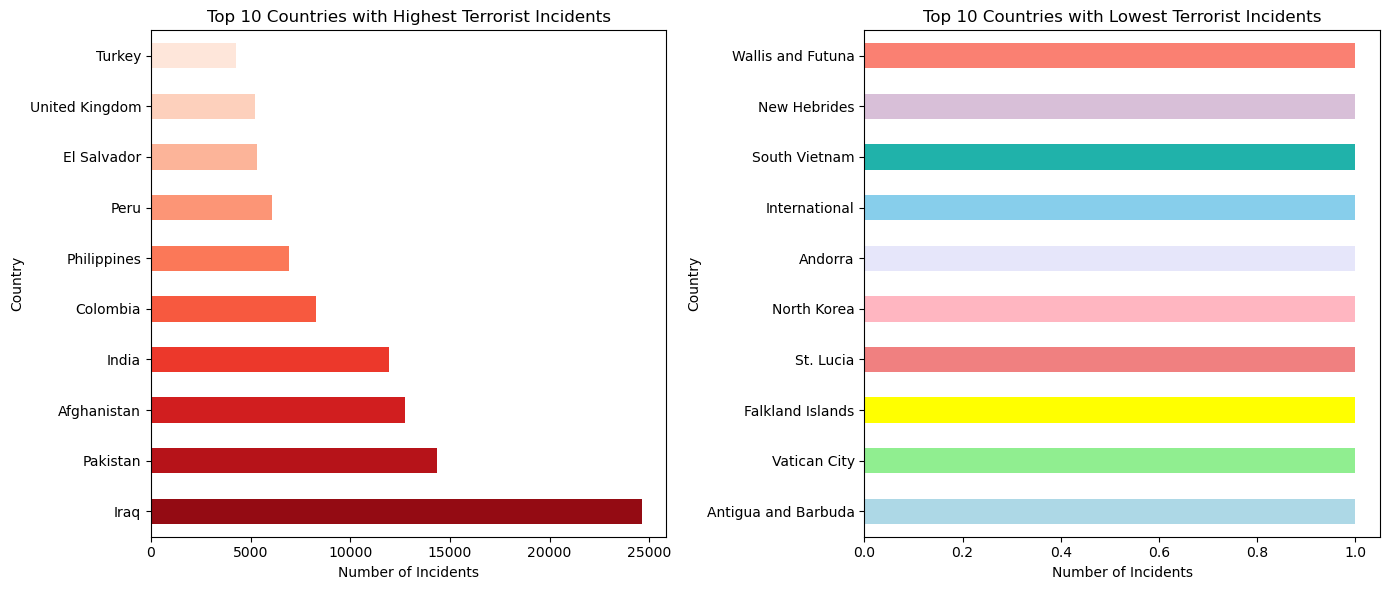

In [111]:
# Calculate the frequency of terrorist incidents for each country
country_counts = terror['Country'].value_counts()

# Sort the countries based on incident frequency in descending order for highest incidents
top_10_highest = country_counts.sort_values(ascending=False).head(10)

# Sort the countries based on incident frequency in ascending order for lowest incidents
top_10_lowest = country_counts.sort_values().head(10)

# Plotting
plt.figure(figsize=(14, 6))

# Define colors for highest incidents
high_colors = sns.color_palette("Reds_r", 10)

# Define colors for lowest incidents
light_colors= ["lightblue",
    "lightgreen",
    "yellow",
    "lightcoral",
    "lightpink",
    "lavender",
    "skyblue",
    "lightseagreen",
    "thistle",
    "salmon"]
low_colors = light_colors

# Plotting for highest incidents
plt.subplot(1, 2, 1)
top_10_highest.plot(kind='barh', color=high_colors)
plt.title('Top 10 Countries with Highest Terrorist Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')

# Plotting for lowest incidents
plt.subplot(1, 2, 2)
top_10_lowest.plot(kind='barh', color=low_colors)
plt.title('Top 10 Countries with Lowest Terrorist Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

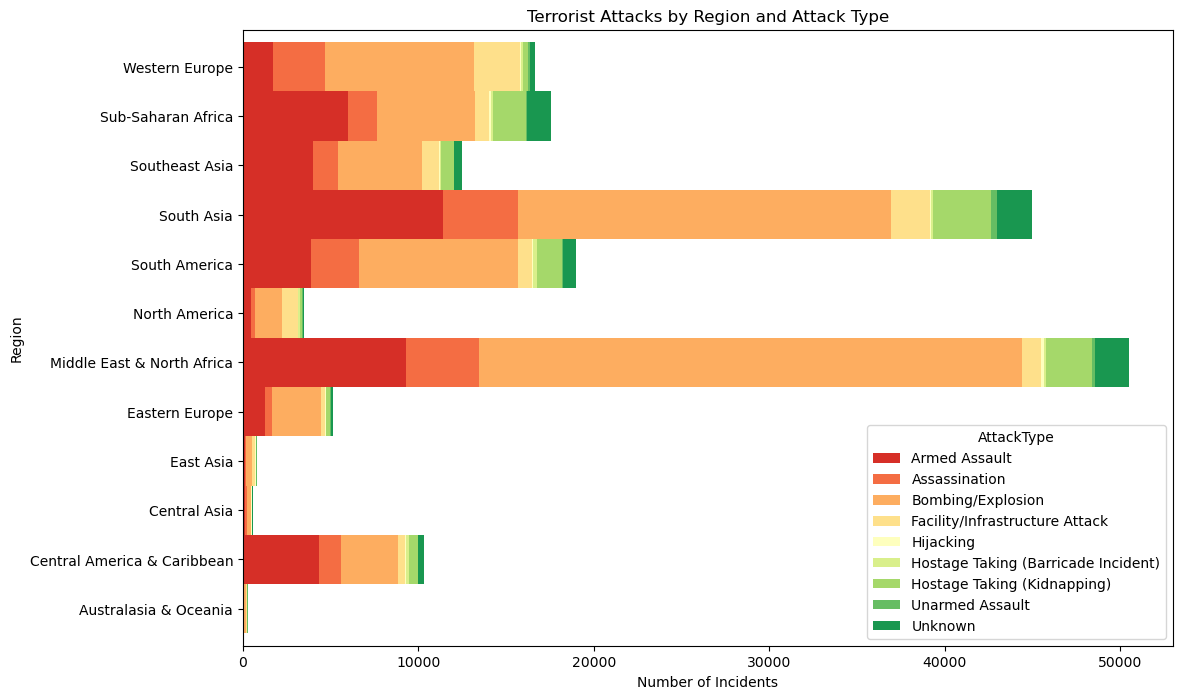

In [90]:
#Plotting the Terrosit Attacks by Region and Attack Type
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)

# Set title and labels
plt.title('Terrorist Attacks by Region and Attack Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Region')

plt.show()

Analysis

The goal was to identify countries and regions that have the highest and lowest number of terrorist incidents from our dataset which recorded terrorism data from 1970 to 2017. 
From the dataset our team took reference from, it indicates the following:

1.	The country with the highest number of terrorist attacks is Iraq
2.	The countries with the lowest number of terrorist attacks are Antigua and Barbuda
3.	The regions with the highest number of terrorist attacks are the Middle East and North Africa
4.	The regions with the lowest number of terrorist attacks are Australasia and Oceania

From the analysis of narrowing down the countries and regions that display high/low terrorism rates, a huge portion of terrorism events occur in developing/third world nations. Iraq shows just under 25,000 terrorist incidents from 1970 to 2017. A lot of key events revolving around terrorism unfortunately comes from Iraq. The data implies that terrorism incidents are evident in regions that have developing or third world infrastructure. It can be due to various social and political reasons. 

In the regions of both the Middle East and North Africa, it shows that from 1970 to 2017, the number of terrorist incidents come up to just under 50,000. In the second chart, the data indicate the different attack types recorded from those incidents. It is evidently shown that a huge portion of those incidents revolve around bombing and explosions. The reason for both regions having this abundant record of attacks is due to most notorious terrorism groups known globally over the years are in both these regions. Also, the reason for these attacks can vary from various social and political reasons. 
